In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite
from cameo.strain_design.deterministic.flux_variability_based import FSEOF

C:\Users\tamwei\Anaconda3\lib\site-packages\redis\connection.py:72: UserWarning: redis-py works best with hiredis. Please consider installing
  warnings.warn(msg)


In [2]:
%run 1._Add_Psilocybin_to_Coynebacterium_Model.ipynb #load our mode

No objective coefficients in model. Unclear what should be optimized


In [3]:
#model = read_sbml_model('iCW773_psilocybin.xml') #Loading the model

In [4]:
#Defining Optimization Target
model.objective = model.reactions.CG_biomass_cgl_ATCC13032
model.optimize().objective_value

0.4289296621348929

In [5]:
#Flux Scanning Enforced Objective Flux Algorithm
fseof = FSEOF(model)
f_result = fseof.run(target=model.reactions.EX_psi_e) #Defining Flux of Interest (x axis)
frdf = f_result.data_frame

Text(0, 0.5, 'Flux $\\left[\\dfrac{mmol}{gDW\\cdot h}\\right]$')

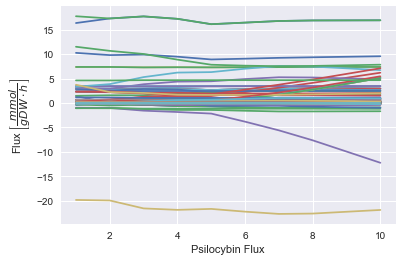

In [6]:
#Plotting FSEOF Results
frdf.T.plot(legend= None) #Legend too big to show
plt.xlabel("Psilocybin Flux")
plt.ylabel(r"Flux $\left[\dfrac{mmol}{gDW\cdot h}\right]$")

In [7]:
frdf['RCiF'] = (frdf[10]-frdf[1])/frdf[10] +1 #Adding "Relative Change in Flux" Column
frdf['Slope'] = frdf[10]-frdf[1]/9 #Slope of the flux

In [8]:
frdf.sort_values(by=['Slope'], ascending= False)

,1,2,3,4,5,6,7,8,9,10,RCiF,Slope
CYTBD2pp,16.370850,17.306423,17.729842,17.232766,16.136197,16.458539,16.789736,16.902701,16.917597,16.932494,1.033170,15.113511
NADH17pp,17.762365,17.306423,17.729842,17.232766,16.136197,16.458539,16.789736,16.902701,16.917597,16.932494,0.950989,14.958898
O2tpp,10.259713,9.800676,9.916703,9.476697,8.908717,9.066638,9.239678,9.356218,9.461506,9.566794,0.927570,8.426826
ADK1,0.570593,0.657502,1.256726,1.571248,1.771630,2.737703,3.741268,4.801173,5.951708,7.102244,1.919660,7.038845
CO2tpp,11.512734,10.672904,10.032173,8.873618,7.829932,7.635606,7.531027,7.583355,7.710977,7.838599,0.531277,6.559406
...,...,...,...,...,...,...,...,...,...,...,...,...
FUMtex,0.000000,0.000000,0.000000,0.000000,-0.594810,-0.581974,-0.585013,-0.767619,-0.884647,-1.001674,2.000000,-1.001674
RPI,-1.071520,-1.085821,-1.166618,-1.166150,-1.170404,-1.170454,-1.170504,-1.173458,-1.184861,-1.196265,1.104279,-1.077207
ASPTA,-1.075630,-1.002538,-1.254954,-1.428576,-1.435086,-1.602751,-1.742933,-1.735824,-1.718706,-1.701587,1.367867,-1.582073
PPKr,-0.976328,-1.023055,-1.582097,-1.856437,-2.177600,-3.835369,-5.612467,-7.655196,-9.955302,-12.255408,1.920335,-12.146927


In [9]:
target_reactions = frdf.loc[(frdf['Slope'] > 0.2) & (frdf['RCiF'] > 1.85)] #Selecting Reactions with a change above 85.00 % and a positive slope
target_reactions.sort_values(by=['Slope'], ascending= False)

,1,2,3,4,5,6,7,8,9,10,RCiF,Slope
ADK1,0.570593,0.657502,1.256726,1.571248,1.771630,2.737703,3.741268,4.801173,5.951708,7.102244,1.919660,7.038845
GLNS,0.433426,0.718415,1.177421,1.270732,1.411702,2.224455,3.119046,4.118646,5.155700,6.192754,1.930011,6.144596
GMPS2,0.024155,0.149861,0.312702,0.353646,0.517784,1.286460,2.136973,3.156910,4.306108,5.455305,1.995572,5.452621
NDPK1,0.181965,0.107558,0.095760,0.083962,0.233128,0.953207,1.755125,2.802425,4.007725,5.213026,1.965094,5.192808
NTPP11,0.000000,0.000000,0.000000,0.000000,0.160963,0.892840,1.706556,2.729561,3.919314,5.109066,2.000000,5.109066
GTPHs,0.000000,0.000000,0.000000,0.000000,0.160963,0.892840,1.706556,2.729561,3.919314,5.109066,2.000000,5.109066
GK1,0.024155,0.021763,0.019371,0.016978,0.175549,0.905034,1.716358,2.736971,3.924331,5.111691,1.995275,5.109007
CBMKr,0.136042,0.122569,0.421920,0.680366,0.739245,0.925656,1.067719,1.085155,1.127028,1.168900,1.883615,1.153784
ARGt3pp,0.000000,0.000000,0.312824,0.584743,0.657095,0.856979,1.012515,1.013070,0.966841,0.920611,2.000000,0.920611
ARGSS,0.081221,0.073177,0.377958,0.641833,0.706141,0.897981,1.045473,1.037985,0.983712,0.929439,1.912613,0.920414


In [10]:
tr1 = target_reactions.drop(labels='RCiF', axis=1) #Removing RCiF column
tr2 = tr1.drop(labels='Slope', axis=1) #Removing Slope column

Text(0.5, 1.02, 'Reactions with a Relative Change in Flux > 85.0 %')

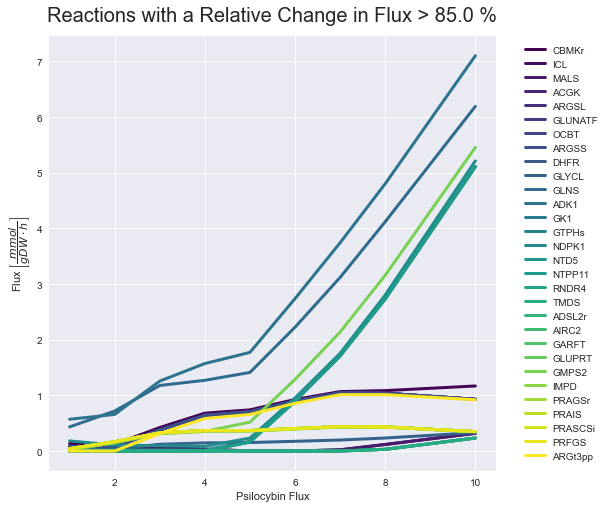

In [11]:
#Plotting depured data frame
fig2 = tr2.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig2.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
fig2.set_xlabel("Psilocybin Flux")
fig2.set_ylabel(r"Flux $\left[\dfrac{mmol}{gDW\cdot h}\right]$")
fig2.set_title('Reactions with a Relative Change in Flux > 85.0 %', size=20, y= 1.02)

In [12]:
Reactions = tr2.index.values.tolist()
for rx in Reactions:
    ID = model.reactions.get_by_id(rx)
    print(ID.id,"  ",ID.name, "  ",ID.reaction)

CBMKr    Carbamate kinase    atp_c + co2_c + nh4_c <=> adp_c + cbp_c + 2.0 h_c
ICL    Isocitrate lyase    icit_c --> glx_c + succ_c
MALS    malate synthase    accoa_c + glx_c + h2o_c --> coa_c + h_c + maL_L_c
ACGK    acetylglutamate kinase    acglu_c + atp_c --> acg5p_c + adp_c
ARGSL    argininosuccinate lyase    argsuc_c --> arg_L_c + fum_c
GLUNATF    glutamate N-acetyltransferase    acorn_c + glu_L_c <=> acglu_c + orn_c
OCBT    ornithine carbamoyltransferase    cbp_c + orn_c --> citr_L_c + h_c + pi_c
ARGSS    argininosuccinate synthase    asp_L_c + atp_c + citr_L_c --> amp_c + argsuc_c + h_c + ppi_c
DHFR    dihydrofolate reductase    dhf_c + h_c + nadph_c <=> nadp_c + thf_c
GLYCL    Glycine Cleavage System    gly_c + nad_c + thf_c --> co2_c + mlthf_c + nadh_c + nh4_c
GLNS    glutamine synthetase    atp_c + glu_L_c + nh4_c --> adp_c + gln_L_c + h_c + pi_c
ADK1    adenylate kinase    amp_c + atp_c <=> 2.0 adp_c
GK1    guanylate kinase (GMP:ATP)    atp_c + gmp_c <=> adp_c + gdp_c
GTPHs 

In [13]:
with model:    
    print("Normal Growth Conditions")
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin Production Rate")
    print(model.slim_optimize())

Normal Growth Conditions
Maximal Growth Rate:
0.42892966213489436
Maximal Psilocybin Production Rate
5.69299883708285e-05


In [14]:
with model:
    model.reactions.ACHMSC.knock_out()
    print("Without", model.reactions.ACHMSC.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without ACHMSC
Maximal Growth Rate:
0.42892966213489325
Maximal Psilocybin production rate
5.69299883708285e-05


In [15]:
with model:
    model.reactions.PPA.knock_out()
    print("Without", model.reactions.PPA.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without inorganic diphosphatase
Maximal Growth Rate:
0.42892966213489325
Maximal Psilocybin production rate
5.692998837082851e-05


In [16]:
with model:
    model.reactions.G1PACT.knock_out()
    print("Without", model.reactions.G1PACT.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without glucosamine-1-phosphate N-acetyltransferase
Maximal Growth Rate:
-1.9368202322555793e-16
Maximal Psilocybin production rate
5.692998837082851e-05


In [17]:
with model:
    model.reactions.G1SAT.knock_out()
    print("Without", model.reactions.G1SAT.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without glutamate-1_Semialdehyde aminotransferase
Maximal Growth Rate:
0.4289296621348948
Maximal Psilocybin production rate
5.69299883708288e-05


In [18]:
with model:
    model.reactions.GLUTRR.knock_out()
    print("Without", model.reactions.GLUTRR.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without glutamyL_tRNA reductase
Maximal Growth Rate:
0.42892966213489375
Maximal Psilocybin production rate
5.692998837082967e-05


In [19]:
with model:
    model.reactions.PPBNGS.knock_out()
    print("Without", model.reactions.PPBNGS.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without porphobilinogen synthase
Maximal Growth Rate:
0.42892966213489314
Maximal Psilocybin production rate
5.6929988370828543e-05


In [20]:
with model:
    model.reactions.SERAT.knock_out()
    print("Without", model.reactions.SERAT.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without serine O-acetyltransferase
Maximal Growth Rate:
-1.4266898024824797e-15
Maximal Psilocybin production rate
-1.3299127853871567e-16


In [21]:
with model:
    model.reactions.MTHFR2.knock_out()
    print("Without", model.reactions.MTHFR2.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without  5,10_Methylenetetrahydrofolate reductase (NADH)
Maximal Growth Rate:
-2.2656342747625785e-16
Maximal Psilocybin production rate
-1.3283787919032498e-17


In [22]:
with model:
    model.reactions.GLNS.knock_out()
    print("Without", model.reactions.GLNS.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without glutamine synthetase
Maximal Growth Rate:
4.220085068391926e-15
Maximal Psilocybin production rate
4.0694599079164935e-16


In [23]:
with model:
    model.reactions.CYSTL.knock_out()
    print("Without", model.reactions.CYSTL.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without cystathionine b_Lyase
Maximal Growth Rate:
1.5930266533273634e-15
Maximal Psilocybin production rate
8.428535714409938e-17


In [24]:
with model:
    model.reactions.HSST.knock_out()
    print("Without", model.reactions.HSST.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without homoserine O-acetyltransferase
Maximal Growth Rate:
0.4289296621348973
Maximal Psilocybin production rate
5.692998836998918e-05


In [25]:
with model:
    model.reactions.METS.knock_out()
    print("Without", model.reactions.METS.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without methionine synthase
Maximal Growth Rate:
9.831250203391728e-15
Maximal Psilocybin production rate
4.267593597730991e-16


In [26]:
with model:
    model.reactions.ADK1.knock_out()
    print("Without", model.reactions.ADK1.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without adenylate kinase
Maximal Growth Rate:
0.4289296621348939
Maximal Psilocybin production rate
5.69299883708285e-05


In [27]:
with model:
    model.reactions.GK1.knock_out()
    print("Without", model.reactions.GK1.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without guanylate kinase (GMP:ATP)
Maximal Growth Rate:
3.650414986231952e-14
Maximal Psilocybin production rate
5.692998837082855e-05


In [28]:
with model:
    model.reactions.GTPHs.knock_out()
    print("Without", model.reactions.GTPHs.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without GTP amine hydrolysis (spontaneous)
Maximal Growth Rate:
0.42892966213489364
Maximal Psilocybin production rate
5.692998837082838e-05


In [29]:
with model:
    model.reactions.NDPK1.knock_out()
    print("Without", model.reactions.NDPK1.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without nucleoside_Diphosphate kinase (ATP:GDP)
Maximal Growth Rate:
0.4289296621348933
Maximal Psilocybin production rate
5.6929988370828496e-05


In [30]:
with model:
    model.reactions.NTPP11.knock_out()
    print("Without", model.reactions.NTP11.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without nucleoside-triphosphatase (dITP)
Maximal Growth Rate:
0.42892966213489925
Maximal Psilocybin production rate
5.692998837082849e-05


In [31]:
with model:
    model.reactions.NADPHQR2.knock_out()
    print("Without", model.reactions.NADPHQR2.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without NADPH Quinone Reductase (Ubiquinone-8)
Maximal Growth Rate:
0.4289296621348949
Maximal Psilocybin production rate
5.692998837082827e-05


In [32]:
with model:
    model.reactions.GMPS2.knock_out()
    print("Without", model.reactions.GMPS2.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without GMP synthase
Maximal Growth Rate:
-3.4332879008061844e-13
Maximal Psilocybin production rate
5.6929988370828625e-05


In [33]:
with model:
    model.reactions.GLUTRS.knock_out()
    print("Without", model.reactions.GLUTRS.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without glutamyL_tRNA synthetase
Maximal Growth Rate:
0.4289296621348932
Maximal Psilocybin production rate
5.6929988370828604e-05


In [34]:
# Overexpression of all targets identified within FSEOF
psi_production = [] #creating empty list to store 
for reaction_id in Reactions:
   with model:
        model.objective = model.reactions.EX_psi_e # setting objective to our product
        model.reactions.get_by_id(reaction_id).lower_bound = model.reactions.get_by_id(reaction_id).upper_bound # forcing the model to overexpress the respective reaction
        print(reaction_id, model.optimize().objective_value)
        psi_production.append(model.optimize().objective_value) # saving the computed psilocybin production to the list psi_prod


CBMKr 2.4353213045339723e-19
ICL 3.893619234574763e-19
MALS 0.0


C:\Users\tamwei\Anaconda3\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


ACGK 5.69299883708285e-05
ARGSL 5.69299883708285e-05
GLUNATF 5.69299883708285e-05
OCBT 5.69299883708285e-05
ARGSS 5.69299883708285e-05
DHFR -5.795411692486385e-22
GLYCL 2.8312805207724492e-14
GLNS 0.0
ADK1 5.69299883708285e-05
GK1 0.0
GTPHs 0.0
NDPK1 5.69299883708285e-05
NTD5 -1.110223024495456e-16
NTPP11 -5.713601207380005e-26
RNDR4 0.0
TMDS 0.0
ADSL2r 6.291263806210615e-16
AIRC2 5.412337245047635e-16
GARFT 3.1225022567582454e-16
GLUPRT 6.245004513516488e-17
GMPS2 0.0
IMPD 2.2035704411964786e-14
PRAGSr 1.249000902703299e-16
PRAIS 1.6653345369377309e-16
PRASCSi -4.163336341695833e-17
PRFGS -3.700743415417188e-17
ARGt3pp 0.0


In [35]:
react_id = [] 
react_name = []

for react in Reactions: 
    with model: 
        model.objective = model.reactions.EX_psi_e
        react_id.append(model.reactions.get_by_id(react).id) #saving reaction_ids to react_id
        react_name.append(model.reactions.get_by_id(react).name) #saving react_names to list react_name



In [36]:
import pandas as pd # importing pandas to enable work with dataframes
for react in Reactions:
    with model: 

        data = {'reaction_id': react_id,
            'reaction_name': react_name,
            'psilocybin_production [mmol/gDW*h], when over-produced': psi_production,        
            }

        df = pd.DataFrame(data) # saving everything to dataframe
df

,reaction_id,reaction_name,"psilocybin_production [mmol/gDW*h], when over-produced"
0,CBMKr,Carbamate kinase,2.435321e-19
1,ICL,Isocitrate lyase,3.893619e-19
2,MALS,malate synthase,0.000000e+00
3,ACGK,acetylglutamate kinase,5.692999e-05
4,ARGSL,argininosuccinate lyase,5.692999e-05
5,GLUNATF,glutamate N-acetyltransferase,5.692999e-05
6,OCBT,ornithine carbamoyltransferase,5.692999e-05
7,ARGSS,argininosuccinate synthase,5.692999e-05
8,DHFR,dihydrofolate reductase,-5.795412e-22
9,GLYCL,Glycine Cleavage System,2.831281e-14
